In [59]:
%matplotlib notebook

In [60]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [61]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\df_prdf_zro2.pkl')
df = pd.read_pickle(path)
df

,structure,name,Zr-Zr PRDF r=0.00-0.50,Zr-Zr PRDF r=0.50-1.00,Zr-Zr PRDF r=1.00-1.50,Zr-Zr PRDF r=1.50-2.00,Zr-Zr PRDF r=2.00-2.50,Zr-Zr PRDF r=2.50-3.00,Zr-Zr PRDF r=3.00-3.50,Zr-Zr PRDF r=3.50-4.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,"[[1.39842671 2.40664143 4.37446042] Zr, [3.615...",Ag_ZrO2_cat_3.125_222_m.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.088289,0.042287,...,0.061330,0.056475,0.061001,0.065090,0.051092,0.056937,0.062655,0.069416,0.043605,0.059658
1,"[[1.41037568 2.41800359 4.39765312] Zr, [3.632...",Ag_ZrO2_cat_3.125_222_o.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.097991,0.041558,...,0.062549,0.052566,0.065333,0.062023,0.050942,0.059967,0.054636,0.067548,0.057549,0.056776
2,"[[-8.63451586 -8.02576822 -6.33664411] Zr, [-6...",Ag_ZrO2_cat_3.125_222_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.074706,0.075097,...,0.066505,0.062730,0.059890,0.060126,0.060051,0.056573,0.062386,0.065002,0.062582,0.055782
3,"[[ 1.30468543 -7.65082882 3.77109169] Zr, [ 3...",Ag_ZrO2_cat_3.125_222_t.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.001940,0.129779,...,0.073647,0.050321,0.072094,0.067465,0.044424,0.057647,0.080648,0.057533,0.057308,0.056483
4,"[[1.38880269 2.40992106 4.37773968] Zr, [3.657...",Ag_ZrO2_cat_6.25_122_m.cif,0.0,0.0,0.0,0.0,0.0,0.000000,0.086219,0.040683,...,0.061586,0.057137,0.061246,0.064274,0.052079,0.055563,0.061908,0.070081,0.043672,0.059160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[-8.87001828 -5.13740927 -8.87001828] Zr, [-8...",Zr_ZrO2_inter_6.25_212_t.cif,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077049,0.059527,0.055724,0.062322
1721,"[[ 1.25503143 -10.19349096 -3.47224897] Zr, ...",Zr_ZrO2_inter_6.25_221_m.cif,0.0,0.0,0.0,0.0,0.0,0.009876,0.076076,0.041215,...,0.057951,0.050722,0.067311,0.062041,0.046797,0.054079,0.056801,0.068213,0.054248,0.047609
1722,"[[ -8.73042916 -10.14298992 2.09308249] Zr, ...",Zr_ZrO2_inter_6.25_221_o.cif,0.0,0.0,0.0,0.0,0.0,0.012346,0.081384,0.038556,...,0.057566,0.054050,0.061284,0.064345,0.047767,0.054900,0.056383,0.066686,0.055482,0.052734
1723,"[[-8.87228424 9.95995753 -4.04166983] Zr, [-8...",Zr_ZrO2_inter_6.25_221_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077109,0.059527,0.055670,0.062322


In [62]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_zro2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [63]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,Zr-Zr PRDF r=0.00-0.50,Zr-Zr PRDF r=0.50-1.00,Zr-Zr PRDF r=1.00-1.50,Zr-Zr PRDF r=1.50-2.00,Zr-Zr PRDF r=2.00-2.50,Zr-Zr PRDF r=2.50-3.00,Zr-Zr PRDF r=3.00-3.50,Zr-Zr PRDF r=3.50-4.00,Zr-Zr PRDF r=4.00-4.50,Zr-Zr PRDF r=4.50-5.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.088289,0.042287,0.013060,0.003637,...,0.061330,0.056475,0.061001,0.065090,0.051092,0.056937,0.062655,0.069416,0.043605,0.059658
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.097991,0.041558,0.005110,0.005911,...,0.062549,0.052566,0.065333,0.062023,0.050942,0.059967,0.054636,0.067548,0.057549,0.056776
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.074706,0.075097,0.000000,0.005911,...,0.066505,0.062730,0.059890,0.060126,0.060051,0.056573,0.062386,0.065002,0.062582,0.055782
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.001940,0.129779,0.000000,0.002728,...,0.073647,0.050321,0.072094,0.067465,0.044424,0.057647,0.080648,0.057533,0.057308,0.056483
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.086219,0.040683,0.011735,0.003759,...,0.061586,0.057137,0.061246,0.064274,0.052079,0.055563,0.061908,0.070081,0.043672,0.059160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,0.008283,0.003316,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077049,0.059527,0.055724,0.062322
1721,0.0,0.0,0.0,0.0,0.0,0.009876,0.076076,0.041215,0.021744,0.009949,...,0.057951,0.050722,0.067311,0.062041,0.046797,0.054079,0.056801,0.068213,0.054248,0.047609
1722,0.0,0.0,0.0,0.0,0.0,0.012346,0.081384,0.038556,0.018638,0.009120,...,0.057566,0.054050,0.061284,0.064345,0.047767,0.054900,0.056383,0.066686,0.055482,0.052734
1723,0.0,0.0,0.0,0.0,0.0,0.014815,0.028307,0.106362,0.008283,0.003316,...,0.068600,0.045228,0.081662,0.058141,0.052948,0.050638,0.077109,0.059527,0.055670,0.062322


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.83953168, 0.08736426,
        0.69904648],
       [0.        , 0.        , 0.        , ..., 0.74862259, 0.60019743,
        0.56436234],
       [0.        , 0.        , 0.        , ..., 0.62465565, 0.78529121,
        0.51787843],
       ...,
       [0.        , 0.        , 0.        , ..., 0.70661157, 0.52418559,
        0.37544696],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53109576,
        0.82359952],
       [0.        , 0.        , 0.        , ..., 0.35812672, 0.53307009,
        0.82359952]])

In [65]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


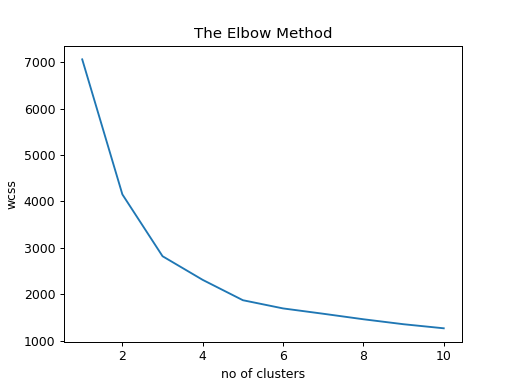

In [8]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [139]:
from sklearn.decomposition import NMF

model = NMF(n_components=5, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [140]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition

,0,1,2,3,4
0,0.063043,0.173450,1.073895,0.000000,0.370522
1,0.106174,0.027018,0.082401,0.000000,0.958086
2,0.981135,0.205317,0.021914,0.004427,0.023491
3,0.089450,1.360364,0.000000,0.425316,0.000000
4,0.105934,0.140370,1.021844,0.001783,0.348599
...,...,...,...,...,...
1720,0.000000,0.468338,0.155619,1.282323,0.002648
1721,0.000000,0.026301,1.204241,0.207182,0.289318
1722,0.000000,0.026834,0.666392,0.161906,0.625011
1723,0.000000,0.469719,0.155967,1.281092,0.002515


In [141]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [144]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l2')

0.6338230511619418

In [145]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','x5','cluster', 'labels']
W_df.head(50)

,x1,x2,x3,x4,x5,cluster,labels
0,0.063043,0.173450,1.073895,0.000000,0.370522,0,m
1,0.106174,0.027018,0.082401,0.000000,0.958086,2,o
2,0.981135,0.205317,0.021914,0.004427,0.023491,1,p-o
3,0.089450,1.360364,0.000000,0.425316,0.000000,4,t
4,0.105934,0.140370,1.021844,0.001783,0.348599,0,m
5,0.959518,0.180359,0.019925,0.007451,0.033660,1,p-o
6,0.172273,1.021041,0.000000,0.572844,0.000000,4,t
7,0.023086,0.140458,0.926990,0.049456,0.442613,0,m
8,0.170985,0.021897,0.137386,0.000000,0.841844,2,o
9,0.988993,0.129544,0.076074,0.016147,0.000000,1,p-o


In [110]:
W_df = W_df.replace({'m': 3, 'p-o': 2, 'o': 0, 't': 1, 'unknown': 4})

In [111]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'c1', 'x2': 'c2', 'x3': 'c3'}, title='NMF 3D Prediction Kmeans'
)
fig.show()

In [112]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'c1', 'x2': 'c2', 'x3': 'c3'}, title='NMF 3D Prediction Kmeans'
)
fig.show()

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

0.8481159420289855

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix(W_df['labels'], W_df['cluster'])

array([[319,   0,   0,  26,   0],
       [  0, 201,   0,   1,  79],
       [  0,   1, 350,  13,  10],
       [  0,   0,   0, 459,   0],
       [  0,  16,  35,  81, 134]], dtype=int64)

In [78]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=3).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)

dftsne['labels'] = labels_true
#dftsne.columns = ['x1','x2', 'x3','cluster', 'labels']
dftsne

,0,1,2,labels
0,-3.085239,10.451900,-9.297152,m
1,1.487747,-13.696905,4.937265,o
2,-17.088766,-1.978476,0.375181,p-o
3,15.747713,0.375646,5.246799,t
4,-3.147419,11.837651,-11.014985,m
...,...,...,...,...
1720,17.513233,12.378123,-2.217242,t
1721,-0.456748,-5.608950,-16.974602,m
1722,3.744850,-13.721951,-7.872975,o
1723,17.513487,12.378272,-2.217170,unknown


In [79]:
kmeans = KMeans(n_clusters=5)
tsne_labels = kmeans.fit_predict(dftsne[[0, 1, 2]])
dftsne['cluster'] = tsne_labels
dftsne.columns = ['x1','x2','x3','labels', 'cluster']


In [80]:
dftsne.head(25)

,x1,x2,x3,labels,cluster
0,-3.085239,10.451900,-9.297152,m,1
1,1.487747,-13.696905,4.937265,o,4
2,-17.088766,-1.978476,0.375181,p-o,3
3,15.747713,0.375646,5.246799,t,2
4,-3.147419,11.837651,-11.014985,m,1
5,-14.633429,-1.534024,0.950086,p-o,3
6,13.125169,1.816317,4.728205,t,2
7,0.358354,13.376759,-11.347721,m,1
8,0.851380,-12.354692,4.906312,o,4
9,-15.009631,-2.095685,-1.435575,p-o,3


<IPython.core.display.Javascript object>


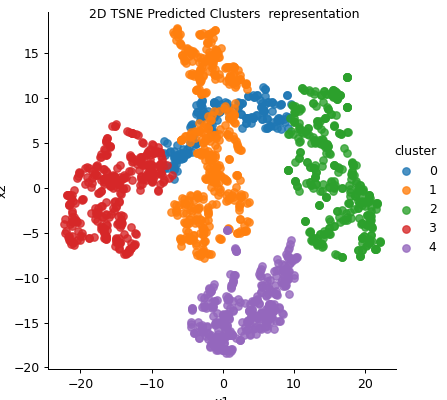

Text(0.5, 0.98, '2D TSNE Predicted Clusters  representation')

In [85]:

lm = sns.lmplot(data=dftsne, x="x1", y="x2",hue='cluster', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Predicted Clusters  representation", fontsize=10)

<IPython.core.display.Javascript object>


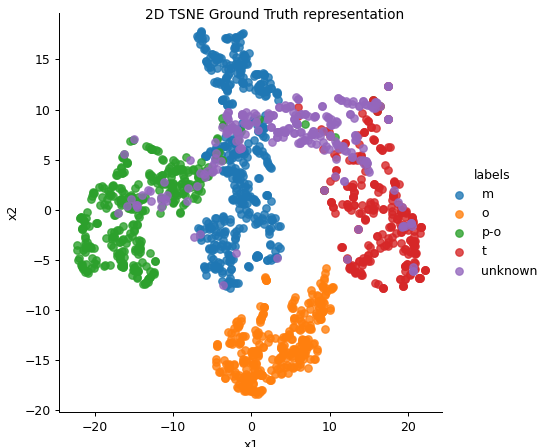

Text(0.5, 0.98, '2D TSNE Ground Truth representation')

In [86]:
# dftsne.drop(columns = ['cluster'])

lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth representation", fontsize=11)

In [87]:
import plotly.express as px
fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['cluster'],
    labels={'x1': 'c1', 'x2': 'c2', 'x3': 'c3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [88]:
import plotly.express as px

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['labels'],
    labels={'x1': 'c1', 'x2': 'c2', 'x3': 'c3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [89]:
dftsne.head(40)

,x1,x2,x3,labels,cluster
0,-3.085239,10.451900,-9.297152,m,1
1,1.487747,-13.696905,4.937265,o,4
2,-17.088766,-1.978476,0.375181,p-o,3
3,15.747713,0.375646,5.246799,t,2
4,-3.147419,11.837651,-11.014985,m,1
5,-14.633429,-1.534024,0.950086,p-o,3
6,13.125169,1.816317,4.728205,t,2
7,0.358354,13.376759,-11.347721,m,1
8,0.851380,-12.354692,4.906312,o,4
9,-15.009631,-2.095685,-1.435575,p-o,3


In [90]:
dftsne = dftsne.replace({'m': 1, 'p-o': 3, 'o': 4, 't': 2, 'unknown': 0})

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])

0.8950724637681159

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(dftsne['labels'], dftsne['cluster'])

array([[147,   5,  94,  20,   0],
       [  0, 456,   0,   0,   3],
       [  4,   0, 277,   0,   0],
       [ 46,   0,   9, 319,   0],
       [  0,   0,   0,   0, 345]], dtype=int64)